# 📊 Customer Churn EDA
### 1️⃣ Notebook Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


Set up analysis environment and visualization defaults for reproducibility.


### 2️⃣ Load & Inspect Data

In [2]:
df = pd.read_csv("../data/raw/customer_churn_dataset-training-master.csv")

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


## Data Understanding & Initial Observations

- The dataset contains 440,833 customer records with 12 features, indicating a large-scale dataset suitable for production-level analysis and machine learning modeling.
- All columns have 440,832 non-null values, indicating no missing data. This removes the need for imputation strategies and allows direct focus on analysis and modeling.
#### The dataset consists of:
1. 9 numerical features (float64)

2. 3 categorical features (object)

3. 1 target variable (Churn)

- This allows for a mix of statistical analysis, visualization, and machine learning techniques.
- The Churn column is stored as a numeric (float64) variable, suggesting a binary target (0 = No Churn, 1 = Churn) that will need to be explicitly treated as a classification label during modeling.
- “Although the target is numeric, it represents a categorical outcome and will be cast appropriately for classification.”
- CustomerID is a numeric identifier and does not carry predictive value. It will be excluded from modeling to avoid introducing noise and data leakage.
- Key numerical features include customer demographics (Age), engagement metrics (Usage Frequency, Support Calls), billing behavior (Payment Delay, Total Spend), and relationship duration (Tenure).

- These variables are likely to have strong predictive power for churn and will be analysed further for distribution, skewness, and outliers.
- The categorical features (Gender, Subscription Type, Contract Length) represent customer segmentation attributes and are expected to have direct business impact on churn behavior.
- They will be encoded using appropriate techniques (e.g., one-hot encoding) before modeling.
- With over 440k records, memory usage (~40 MB) is manageable but requires efficient operations. Vectorised Pandas operations and careful feature selection will be applied to ensure performance efficiency.

## 3️⃣ Data Quality Checks (VERY IMPORTANT)

#### 🔹 Missing values

In [3]:
df.isnull().sum()


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

The dataset contains a minimal number of missing values, with exactly one missing observation per feature. Given the dataset size (440k+ records), this represents a negligible proportion and will not materially impact analysis or modeling.
Due to the extremely low percentage of missing data, rows with missing values can be safely removed without introducing bias or loss of information.

In [4]:
df = df.dropna()
df.isnull().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
df.duplicated().sum()



0

In [6]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

Dataset contains no/multiple missing values. Data types reviewed to ensure compatibility for ML models.

### 4️⃣ Target Variable Analysis (Churn Distribution)

In [7]:
df['Churn'].value_counts(normalize=True)


1.0    0.567107
0.0    0.432893
Name: Churn, dtype: float64


### Numerical Feature Analysis

In [8]:

import seaborn as sns

# Set plotting style
sns.set(style="whitegrid", palette="muted")

# List of numerical features
num_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Summary statistics
df[num_features].describe()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


The summary statistics provide an overview of customer demographics, engagement, and billing behavior. Features like Usage Frequency, Support Calls, and Total Spend show a wide range of values, indicating variability among customers that can drive churn prediction.

In [9]:
# Drop ID as it has no predictive power
df = df.drop('CustomerID', axis=1)

# Check for missing values
print(df.isnull().sum())

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


#### Data Integrity Check
Action: Dropped customerid as it is a unique identifier with no predictive value.

Observation: Checked for missing values. No missing values in the data.

### Target Variable Analysis

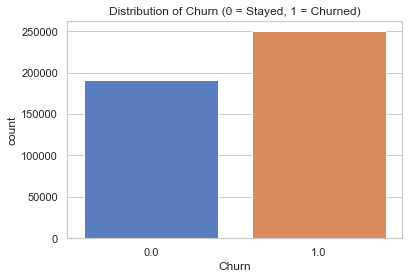

1.0    0.567107
0.0    0.432893
Name: Churn, dtype: float64


In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (0 = Stayed, 1 = Churned)')
plt.show()

print(df['Churn'].value_counts(normalize=True))

- The target variable Churn shows that approximately 43% of customers are retained and 57% have churned. This indicates a moderate class imbalance that must be considered when building predictive models.
- Given the imbalance, metrics such as Recall, Precision, F1-Score, and ROC-AUC will be prioritized over simple accuracy. This ensures that the model can effectively identify customers at risk of churn.


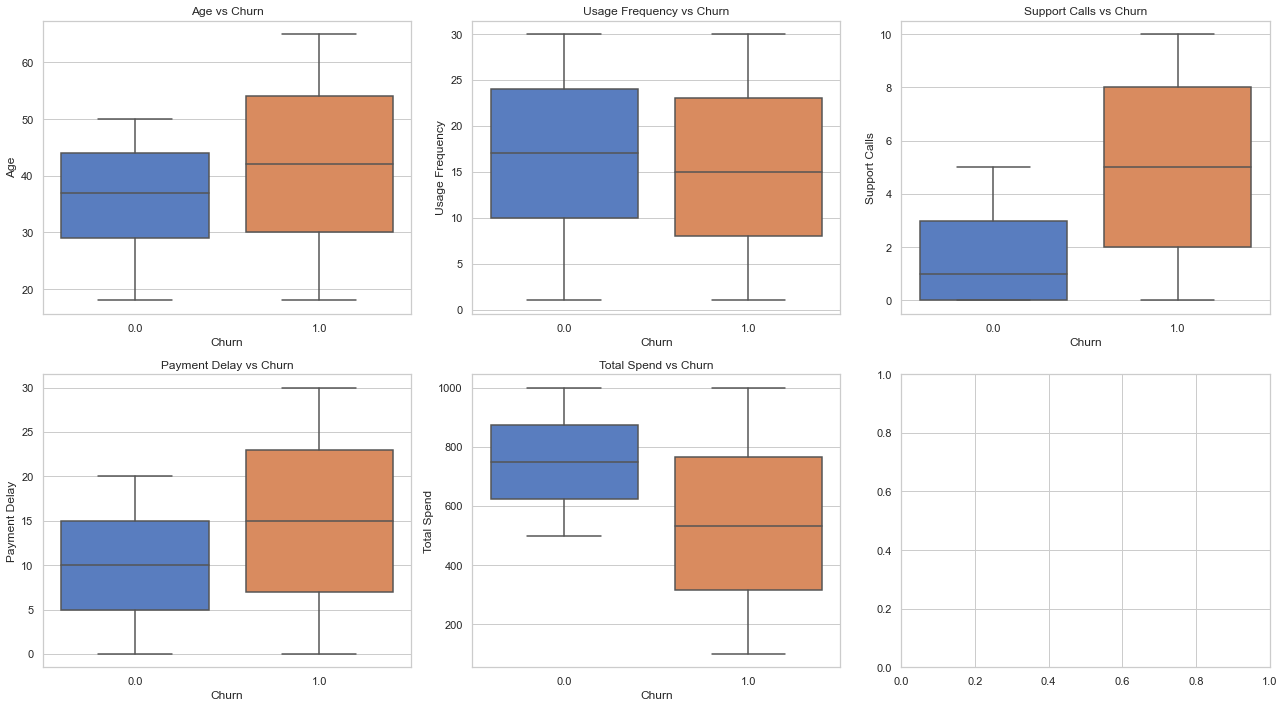

In [14]:
cols_to_plot = ['Age', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col.replace("_", " ").title()} vs Churn')

plt.tight_layout()
plt.show()

#### Numerical Feature Analysis: Key Observations

Support Calls & Churn (Critical): There is a massive difference here. Churned customers (1.0) have a much higher median number of support calls (around 5) compared to loyal customers (around 1). Insight: Excessive support calls are a "red flag" indicator of imminent churn.

Payment Delay: Churned customers consistently show higher median payment delays (around 15 days) compared to loyal customers (around 10 days). Insight: Financial friction or late payments are strong predictors of account cancellation.

Total Spend: Loyal customers have a significantly higher median spend (around $750) than those who churn (around $520). Insight: We are losing "Middle-Value" customers; the extremely high-spenders seem more stable, but the drop-off in the $400-$600 range is significant.

Age: Churned customers trend slightly older (median ~42) compared to loyal customers (median ~37).


### Categorical Impact

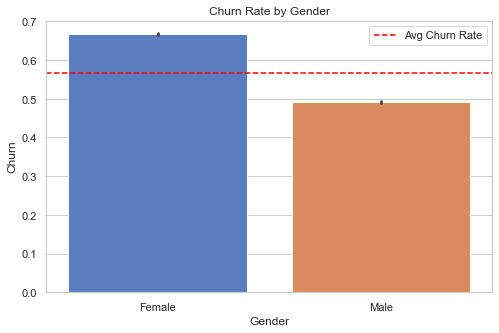

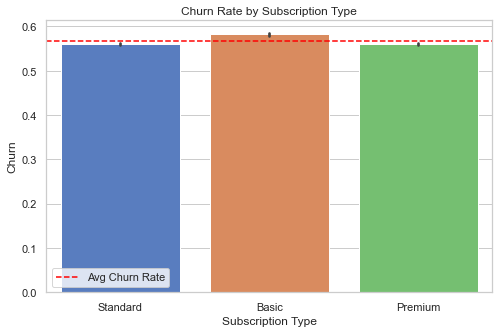

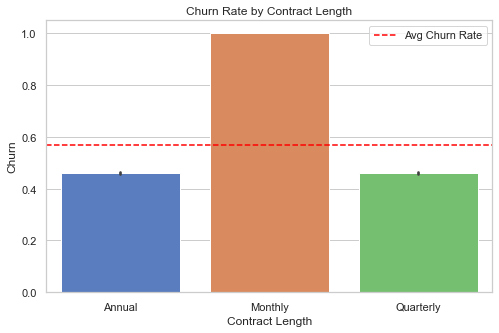

In [16]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f'Churn Rate by {col.title()}')
    plt.axhline(df.Churn.mean(), color='red', linestyle='--', label='Avg Churn Rate')
    plt.legend()
    plt.show()

#### EDA Executive Summary & InsightsSupport Calls: 
This is the strongest predictor. Churned customers have a significantly higher median number of support calls ($>4$) compared to loyal customers.Payment Delays: Customers who leave tend to have longer payment delays ($>15$ days), indicating possible financial friction or dissatisfaction.Total Spend: Interestingly, lower total spend is associated with higher churn, suggesting we are losing customers before they reach a high lifetime value.Subscription Type: The churn rate is relatively consistent across types, though "Basic" shows a slight peak above the average.Modeling Strategy: Since the features have different scales (e.g., Age vs. Total Spend), I will use a Tree-based model (Random Forest or XGBoost) as they are robust to different feature scales and capture non-linear relationships well.

### Multi-Collinearity Heatmap

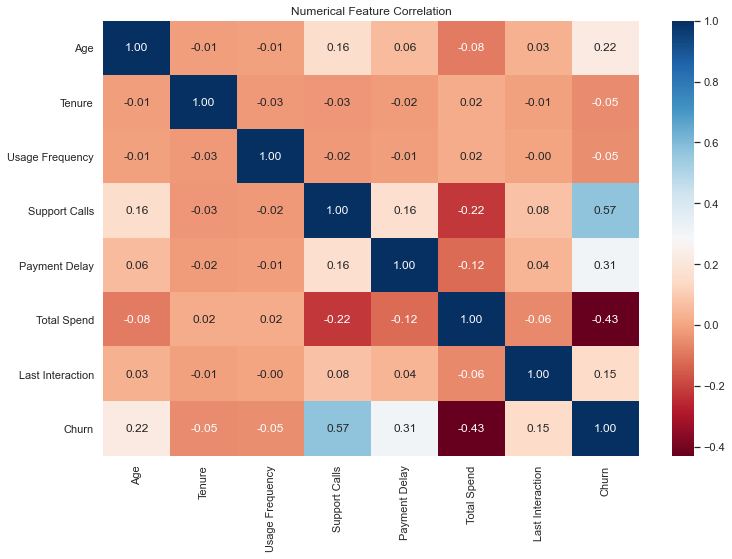

In [17]:
plt.figure(figsize=(12, 8))
# Only include numeric columns for standard correlation
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Numerical Feature Correlation')
plt.show()

#### Business Insights & FindingsPrimary Churn Driver: 
Support Calls show the strongest positive correlation ($0.57$) with churn. Customers experiencing high friction (5+ calls) are much more likely to leave.Payment Behavior: Payment Delay is also positively correlated ($0.31$) with churn. Increased delays are a major red flag for customer dissatisfaction.Financial Impact: Total Spend is negatively correlated ($-0.43$) with churn. We are seeing a significant loss of customers in the lower-to-middle spending tiers ($<$ $600).Subscription Trends: Churn remains relatively stable across types, though Basic subscriptions show a slightly higher rate than Premium or Standard.